<h1><center>Régression linéaire multiple</center></h1>

<h4>À propos de ce notebook</h4>
Dans ce cahier, nous apprenons à utiliser scikit-learn pour implémenter la régression linéaire multiple. Nous téléchargeons un ensemble de données lié à la consommation de carburant et aux émissions de dioxyde de carbone des voitures. Ensuite, nous divisons nos données en ensembles d'entraînement et de test, créons un modèle à l'aide d'un ensemble d'entraînement, évaluons votre modèle à l'aide d'un ensemble de test et enfin utilisons le modèle pour prédire une valeur inconnue.

<h1>Table des matières</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Compréhension des données</a></li>
        <li><a href="#reading_data">Lecture des données in</a></li>
        <li><a href="#multiple_regression_model">Modèle de régression multiple</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

### Importation des packages nécessaires

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.pyplot'

### Téléchargement des données
Pour télécharger les données, nous utiliserons! Wget pour les télécharger à partir d'IBM Object Storage.

In [2]:
!curl -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv > FuelConsumption.csv

curl: Remote file name has no length!
curl: (23) Failed writing received data to disk/application


__Le saviez-vous?__ En ce qui concerne le Machine Learning, vous travaillerez probablement avec de grands ensembles de données. En tant qu'entreprise, où pouvez-vous héberger vos données? IBM offre une opportunité unique aux entreprises, avec 10 To d'IBM Cloud Object Storage: [Inscrivez-vous maintenant gratuitement] (http://cocl.us/ML0101EN-IBM-Offer-CC)

<h2 id="understanding_data">Comprendre le Data</h2>

### `FuelConsumption.csv`:
Nous avons téléchargé un ensemble de données sur la consommation de carburant, **`FuelConsumption.csv`**, qui contient les cotes de consommation de carburant propres au modèle et les émissions de dioxyde de carbone estimées pour les véhicules légers neufs vendus au détail au Canada. [Source de l'ensemble de données] (http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** par ex. 2014
- **FAIRE** par ex. Acura
- **MODÈLE** par ex. ILX
- **CLASSE DE VÉHICULE** par ex. SUV
- **TAILLE MOTEUR** par ex. 4.7
- **CYLINDRES** par exemple 6
- **TRANSMISSION** par ex. A6
- **FUELTYPE** par ex. z
- **CONSOMMATION DE CARBURANT EN VILLE (L / 100 km)** par ex. 9,9
- **CONSOMMATION DE CARBURANT sur autoroute (L / 100 km)** par ex. 8,9
- **PEIGNE DE CONSOMMATION DE CARBURANT (L / 100 km)** par ex. 9.2
- **ÉMISSIONS DE CO2 (g / km)** par ex. 182 -> faible -> 0

<h2 id="reading_data">Lecture des données </h2>

In [6]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Permet de sélectionner certaines fonctionnalités que nous voulons utiliser pour la régression.

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Permet de tracer les valeurs d'émission par rapport à la taille du moteur:

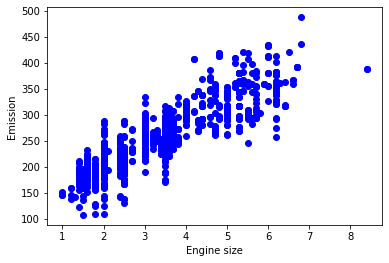

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Création d'un ensemble de données de train et de test
Train / Test Split implique la division de l'ensemble de données en ensembles d'apprentissage et de test respectivement, qui sont mutuellement exclusifs. Après quoi, vous vous entraînez avec l'ensemble d'entraînement et testez avec l'ensemble de test.
Cela fournira une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour entraîner les données. C'est plus réaliste pour les problèmes du monde réel.

Cela signifie que nous connaissons le résultat de chaque point de données dans cet ensemble de données, ce qui en fait un excellent test! Et comme ces données n'ont pas été utilisées pour entraîner le modèle, le modèle n'a aucune connaissance du résultat de ces points de données. Il s’agit donc essentiellement d’un test hors échantillon.

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Distribution des données d'apprentissage

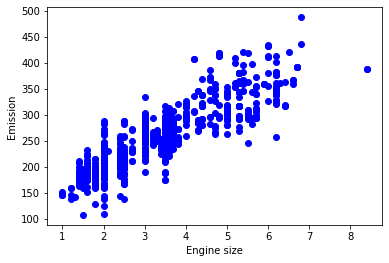

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Modèle de régression multiple</h2>

En réalité, il existe plusieurs variables qui prédisent l'émission de Co2. Lorsque plusieurs variables indépendantes sont présentes, le processus est appelé régression linéaire multiple. Par exemple, prédire les émissions de co2 à l'aide de FUELCONSUMPTION_COMB, EngineSize et Cylinders of cars. La bonne chose ici est que la régression linéaire multiple est l'extension du modèle de régression linéaire simple.

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.27776485  7.58629833  9.13213315]]


Comme mentionné précédemment, __Coefficient__ et __Intercept__, sont les paramètres de la ligne d'ajustement.
Étant donné qu'il s'agit d'une régression linéaire multiple, avec 3 paramètres, et sachant que les paramètres sont l'ordonnée à l'origine et les coefficients de l'hyperplan, sklearn peut les estimer à partir de nos données. Scikit-learn utilise la méthode ordinaire des moindres carrés ordinaires pour résoudre ce problème.

#### Moindres carrés ordinaires(MOC) ( Ordinary Least Squares (OLS))
MOC est une méthode d'estimation des paramètres inconnus dans un modèle de régression linéaire. MOC choisit les paramètres d'une fonction linéaire d'un ensemble de variables explicatives en minimisant la somme des carrés des différences entre la variable dépendante cible et celles prédites par la fonction linéaire. En d'autres termes, il essaie de minimiser la somme des erreurs quadratiques (SSE) ou de l'erreur quadratique moyenne (MSE) entre la variable cible (y) et notre sortie prédite ($\hat{y}$) sur tous les échantillons de l'ensemble de données.

OLS peut trouver les meilleurs paramètres à l'aide des méthodes suivantes:
    - Résolution analytique des paramètres du modèle à l'aide d'équations de forme fermée
    - Utilisation d'un algorithme d'optimisation (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

<h2 id="prediction">Prediction</h2>

In [13]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 526.05
Variance score: 0.88


__score de régression de la variance expliqué:__
Si $\hat{y}$ est la sortie cible estimée, y la sortie cible correspondante (correcte) et Var est la variance, le carré de l'écart type, alors la variance expliquée est estimée comme suit:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$
Le meilleur score possible est de 1,0, les valeurs inférieures sont pires.

<h2 id="practice">Pratique</h2>
Essayez d'utiliser une régression linéaire multiple avec le même jeu de données, mais cette fois, utilisez __CONSOMMATION DE CARBURANT dans CITY__ et
__CONSOMMATION DE CARBURANT sur HWY__ au lieu de FUELCONSUMPTION_COMB. Cela se traduit-il par une meilleure précision?

In [ ]:
# write your code here



Double-cliquez __ici__ pour la solution.

<!-- Your answer is below:

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))


-->